In [1]:
# Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

import sys, os
pwd = os.getcwd()

printmd('+ **Directory of this workbook**:')
print '\tpwd =', pwd

data_path = pwd+'/SVR/Position_Salaries.csv'
printmd('\n  + **Full path of the data file**:')
print '\tdata_path =', data_path

dataset = pd.read_csv(data_path)
# Importing the dataset
dataset = pd.read_csv(data_path)
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

+ **Directory of this workbook**:

	pwd = /eos/home-f/franzoni/SWAN_projects/ML-A-Z-Hands-On-Python-R/Machine_Learning_A-Z_Template_Folder/Part_2_-_Regression/Section_7_-_Support_Vector_Regression_(SVR)



  + **Full path of the data file**:

	data_path = /eos/home-f/franzoni/SWAN_projects/ML-A-Z-Hands-On-Python-R/Machine_Learning_A-Z_Template_Folder/Part_2_-_Regression/Section_7_-_Support_Vector_Regression_(SVR)/SVR/Position_Salaries.csv


In [3]:
# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = y.reshape(-1, 1)
y = sc_y.fit_transform(y)

/cvmfs/sft.cern.ch/lcg/views/LCG_96/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
# Fitting the SVR to the dataset
# Create your regressor here
# illustrative example here : https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

/cvmfs/sft.cern.ch/lcg/views/LCG_96/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
# Predicting a new result
# predict wants a matrix, which in this case is a 1x1 matrix
x_to_predict = np.array([[6.5]])
y_pred = sc_y.inverse_transform( regressor.predict( sc_X.transform(x_to_predict) )  )
print(y_pred)

[170370.0204065]


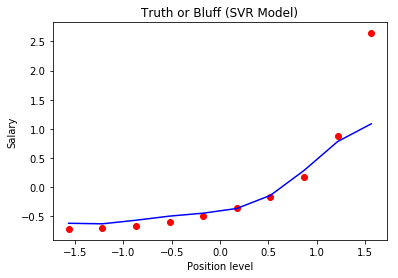

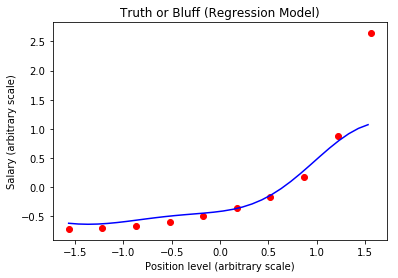

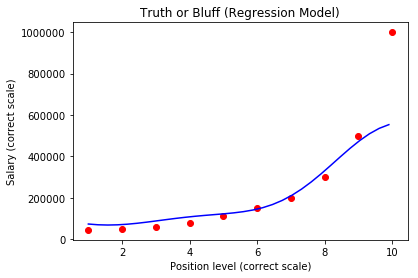

In [9]:
# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level (arbitrary scale)')
plt.ylabel('Salary (arbitrary scale)')
plt.show()

# Visualising the SVR results (for higher resolution and smoother curve) and correct scale!
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regressor.predict(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level (correct scale)')
plt.ylabel('Salary (correct scale)')
plt.show()